In [1]:
import os
import sys

#first step is to concatenate sequence quality scores from the fastqc output for each sample into one file.
#opening an output file to concatenate in.
w=open('output_seq_qual.txt',"w")

In [2]:
location=os.getcwd()
for root, dirs, files in os.walk(location):
    for name in files:
        if (name=="fastqc_data.txt"):
            folder=root.split("/")
            filname=folder[-1]
            with open(os.path.join(root,name),"r") as f:
                f2=f.readlines()
                for lines in range(13,len(f2)):
                    #print(f2[lines])
                    if(f2[lines]!=f2[10]):
                        w.write(filname+"\t"+f2[lines])
                    else:
                        break
                        

w.close()

#This searches the current working directory for any file names "fastqc_data.txt"(standard output name for fastqc run). and concatenates the sequence quality scores from each into one file. 


In [4]:
#Next step is to plot the results using ggplot2 in R. 
%load_ext rpy2.ipython
%R library(ggplot2)

/Users/Azaidi/anaconda/lib/python2.7/site-packages/rpy2/robjects/functions.py:106: UserWarning: Use suppressPackageStartupMessages to eliminate package startup messages.

  res = super(Function, self).__call__(*new_args, **new_kwargs)


array(['ggplot2', 'tools', 'stats', 'graphics', 'grDevices', 'utils',
       'datasets', 'methods', 'base'], 
      dtype='|S9')

In [8]:
%%R

tr<-read.table('output_seq_qual.txt',header=F,stringsAsFactors=F)
head(tr)

                                V1 V2       V3 V4 V5 V6 V7 V8
1 m453-k897_S19_L001_R1_001_fastqc  1 33.45381 34 34 34 34 34
2 m453-k897_S19_L001_R1_001_fastqc  2 33.52694 34 34 34 34 34
3 m453-k897_S19_L001_R1_001_fastqc  3 33.55641 34 34 34 34 34
4 m453-k897_S19_L001_R1_001_fastqc  4 33.61111 34 34 34 34 34
5 m453-k897_S19_L001_R1_001_fastqc  5 33.60597 34 34 34 34 34
6 m453-k897_S19_L001_R1_001_fastqc  6 37.07675 38 38 38 36 38


In [10]:
%%R
colnames(tr)<-c("id","bp","mean","median","p25","p75","p10","p90")
tr$IID<-sapply(tr$id,function(x){paste(unlist(strsplit(as.character(x[1]),split="_"))[c(1,2,4)],collapse="")})

f<-function(x){factor(x,levels=unique(as.character(x)))}

In [11]:
%%R
p<-ggplot(tr)+geom_point(aes(f(bp),p10),size=1,alpha=0.5,color="black")+geom_point(aes(f(bp),p90),size=1,alpha=0.5,color="black")+geom_point(aes(f(bp),p25),size=1,alpha=0.5,color="blue")+geom_point(aes(f(bp),p75),size=1,alpha=0.5,color="blue")+geom_point(aes(f(bp),median),size=1,color="red")+facet_wrap(~IID)+theme_bw()+theme(axis.text.x=element_blank(),strip.text=element_text(size=8))+labs(list(title="Sequence quality from the 5'end",x="BP from 5' end",y="Quality score"))


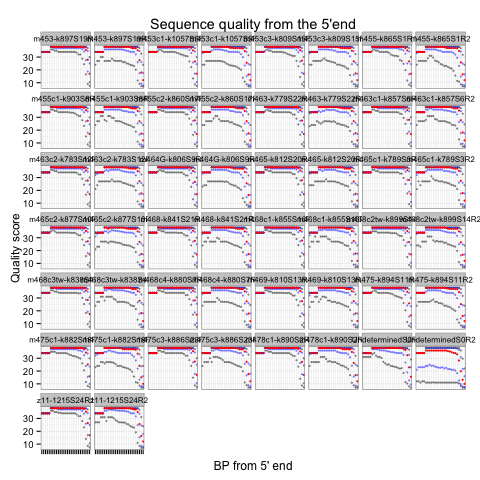

In [12]:
%%R
p

In [13]:

%R ggsave('qual_by_bp.pdf',p) ##save plot in pdf format

/Users/Azaidi/anaconda/lib/python2.7/site-packages/rpy2/robjects/functions.py:106: UserWarning: Saving 6.67 x 6.67 in image

  res = super(Function, self).__call__(*new_args, **new_kwargs)
